In [150]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import cdist

In [151]:
muzea2022 = pd.read_csv("muzea2022.csv")
ludnosc2022= pd.read_csv("ludnosc2009.csv")


In [152]:
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [153]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [154]:
list = [muzea2022, ludnosc2022]

for i in list:
    i.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)

In [155]:
muzea2022.rename(columns={
    'Muzea|muzea łącznie z oddziałami' : 'muzea2022'
}, inplace=True)
ludnosc2022.rename(columns={
    'Ludność wg płci oraz w podziale na miasto i wieś (dane półroczne)|rok|ogółem|ogółem' : 'ludnosc2022'
}, inplace=True)

In [156]:
muzea2022.head()

,powiat,Województwo,muzea2022
0,proszowicki,małopolskie,1.0
1,oświęcimski,małopolskie,4.0
2,ostrzeszowski,wielkopolskie,1.0
3,szczecinecki,zachodniopomorskie,2.0
4,goleniowski,zachodniopomorskie,0.0


In [157]:
ludnosc2022.head()

,powiat,Województwo,ludnosc2022
0,krakowski,małopolskie,253344.0
1,nowosądecki,małopolskie,202701.0
2,tarnowski,małopolskie,195908.0
3,nowotarski,małopolskie,185161.0
4,Sopot,pomorskie,38460.0


In [158]:
print("Czy Wałbrzych i karkonoski są w muzea2022?")
print("Wałbrzych" in muzea2022['powiat'].values)
print("karkonoski" in muzea2022['powiat'].values)

print("\nCzy Wałbrzych i karkonoski są w ludnosc2022?")
print("Wałbrzych" in ludnosc2022['powiat'].values)
print("karkonoski" in ludnosc2022['powiat'].values)

Czy Wałbrzych i karkonoski są w muzea2022?
True
True

Czy Wałbrzych i karkonoski są w ludnosc2022?
False
False


In [159]:
ludnosc2022['powiat'].nunique()

369

In [160]:
muzea2022['powiat'].nunique()

370

In [161]:
muzea2022['powiat'] = muzea2022['powiat'].str.strip()
ludnosc2022['powiat'] = ludnosc2022['powiat'].str.strip()

In [162]:
# Połączenie muzea2022 i ludnosc2022 po powiecie i województwie
muzea2022_merge = muzea2022.merge(
    ludnosc2022,
    on=['powiat', 'Województwo'],  #
    how='inner'  
)


print(muzea2022_merge.head())


          powiat         Województwo  muzea2022  ludnosc2022
0    proszowicki         małopolskie        1.0      43419.0
1    oświęcimski         małopolskie        4.0     153602.0
2  ostrzeszowski       wielkopolskie        1.0      54973.0
3   szczecinecki  zachodniopomorskie        2.0      77053.0
4    goleniowski  zachodniopomorskie        0.0      79937.0


In [163]:
muzea2022_merge.head()

,powiat,Województwo,muzea2022,ludnosc2022
0,proszowicki,małopolskie,1.0,43419.0
1,oświęcimski,małopolskie,4.0,153602.0
2,ostrzeszowski,wielkopolskie,1.0,54973.0
3,szczecinecki,zachodniopomorskie,2.0,77053.0
4,goleniowski,zachodniopomorskie,0.0,79937.0


In [164]:
muzea2022_merge['muzea2022_średnia_powiaty'] = (muzea2022_merge['muzea2022']/muzea2022_merge['ludnosc2022']) * 10000

In [165]:
print(muzea2022_merge[['powiat', 'muzea2022_średnia_powiaty']])

            powiat  muzea2022_średnia_powiaty
0      proszowicki                   0.230314
1      oświęcimski                   0.260413
2    ostrzeszowski                   0.181907
3     szczecinecki                   0.259562
4      goleniowski                   0.000000
..             ...                        ...
373        łosicki                   0.311798
374     sokołowski                   0.358218
375      węgrowski                   0.298151
376   sochaczewski                   0.476599
377    żyrardowski                   0.397836

[378 rows x 2 columns]


In [166]:
print(muzea2022_merge.isnull().sum())   

powiat                       0
Województwo                  0
muzea2022                    0
ludnosc2022                  0
muzea2022_średnia_powiaty    0
dtype: int64


In [167]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [168]:

pow_m['JPT_NAZWA_clean'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False).str.strip()

# Połączenie pow_m z muzea2022
merged_pow_m_muzea2022 = pow_m.merge(muzea2022_merge, left_on='JPT_NAZWA_clean', right_on='powiat', how='left')



In [169]:
merged_pow_m_muzea2022.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,SHAPE_AREA,REGON,RODZAJ,geometry,JPT_NAZWA_clean,powiat,Województwo,muzea2022,ludnosc2022,muzea2022_średnia_powiaty
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21...",krośnieński,krośnieński,lubuskie,0.0,56131.0,0.000000
1,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21...",krośnieński,krośnieński,podkarpackie,7.0,110849.0,0.631490
2,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69...",elbląski,elbląski,warmińsko-mazurskie,0.0,56389.0,0.000000
3,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61...",ostrołęcki,ostrołęcki,mazowieckie,2.0,84578.0,0.236468
4,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61...",sępoleński,sępoleński,kujawsko-pomorskie,1.0,41045.0,0.243635


In [170]:
missing_powiaty = merged_pow_m_muzea2022[merged_pow_m_muzea2022['muzea2022'].isnull()]
print(missing_powiaty[['JPT_NAZWA_clean', 'muzea2022']])

    JPT_NAZWA_clean  muzea2022
346      karkonoski        NaN
397       Wałbrzych        NaN


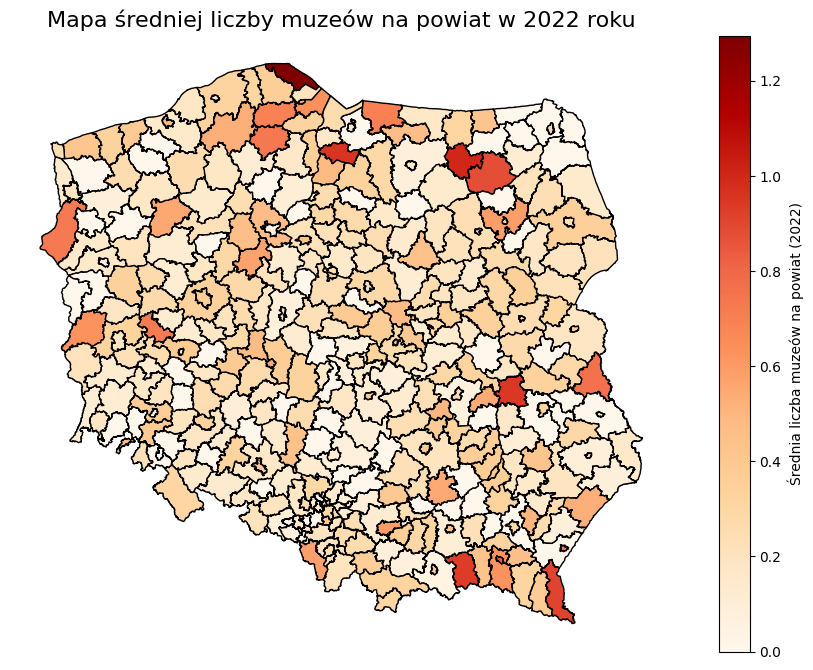

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_pow_m_muzea2022.plot(column='muzea2022_średnia_powiaty', cmap='OrRd', legend=True, 
                  legend_kwds={'label': "Średnia liczba muzeów na powiat (2022)"},
                  ax=ax, edgecolor='black')
ax.set_title("Mapa średniej liczby muzeów na powiat w 2022 roku", fontsize=16)
ax.set_axis_off()

plt.show()


In [172]:
# Powiaty z największą liczbą muzeów
najwiecej_muzeow = muzea2022_merge.sort_values(by='muzea2022_średnia_powiaty', ascending=False).head(5)
print("Powiaty z największą liczbą muzeów na 10000 mieszkańców:")
print(najwiecej_muzeow[['powiat', 'Województwo', 'muzea2022_średnia_powiaty']])

Powiaty z największą liczbą muzeów na 10000 mieszkańców:
        powiat          Województwo  muzea2022_średnia_powiaty
236      pucki            pomorskie                   1.294700
258  mrągowski  warmińsko-mazurskie                   0.996631
245   sztumski            pomorskie                   0.959371
312   puławski            lubelskie                   0.949422
91    gorlicki          małopolskie                   0.934431


In [173]:
merged_pow_m_muzea2022 = merged_pow_m_muzea2022[
    ~merged_pow_m_muzea2022['JPT_NAZWA_clean'].isin(['karkonoski', 'Wałbrzych'])
]


In [174]:
gdf = merged_pow_m_muzea2022.copy()
gdf = gdf.to_crs("EPSG:2180") 


In [175]:
gdf['powiat'].nunique()

368

In [176]:
#Obliczamy centroidy
gdf['centroid'] = gdf.geometry.centroid

In [177]:
gdf['key'] = 1
df_c = gdf[['powiat','Województwo','centroid','muzea2022','ludnosc2022','key']].copy()


In [178]:
#Tworzymy wszystkie pary (i, j) 
cross = df_c.merge(df_c, on='key', suffixes=('_i','_j'))

In [179]:
#Liczymy odległości między centroid_i i centroid_j 
cross['dist'] = cross.apply(
    lambda row: row['centroid_i'].distance(row['centroid_j']),
    axis=1
)


In [180]:
#Wykluczamy i=j, żeby suma była tylko po powiatach innych niż i 
cross_diff = cross[cross['powiat_i'] != cross['powiat_j']].copy()

In [181]:
#Liczymy wkłady do sum muzeów i ludności: z_j / (dist+1), l_j / (dist+1)
cross_diff['w_muzea']   = cross_diff['muzea2022_j']   / (cross_diff['dist'] + 1)
cross_diff['w_ludnosc'] = cross_diff['ludnosc2022_j'] / (cross_diff['dist'] + 1)


In [182]:
# Sumujemy w grupach “powiat_i"
sum_muzea = cross_diff.groupby('powiat_i')['w_muzea'].sum().reset_index(name='sum_muzea_j')
sum_ludnosc = cross_diff.groupby('powiat_i')['w_ludnosc'].sum().reset_index(name='sum_ludnosc_j')


In [183]:
gdf = gdf.merge(sum_muzea, left_on='powiat', right_on='powiat_i', how='left')
gdf = gdf.merge(sum_ludnosc, left_on='powiat', right_on='powiat_i', how='left')


In [184]:
# U_i = z_i + ∑(z_j / (d_ij + 1))
gdf['U_i'] = gdf['muzea2022'] + gdf['sum_muzea_j']


In [185]:
# V_i = l_i + ∑(l_j / (d_ij + 1))
gdf['V_i'] = gdf['ludnosc2022'] + gdf['sum_ludnosc_j']


In [186]:
# Wskaźnik dostępności: D_i = U_i / V_i
gdf['D_i'] = gdf['U_i'] / gdf['V_i']

In [190]:
print(gdf[['powiat','Województwo', 'U_i', 'V_i', 'D_i']].head(10))

        powiat          Województwo        U_i            V_i           D_i
0  krośnieński             lubuskie   0.017117   56796.007387  3.013847e-07
1  krośnieński         podkarpackie   7.017117  111514.007387  6.292588e-05
2     elbląski  warmińsko-mazurskie   0.004895   56567.217838  8.653584e-08
3   ostrołęcki          mazowieckie   2.004922   84767.823969  2.365192e-05
4   sępoleński   kujawsko-pomorskie   1.004810   41234.617435  2.436813e-05
5       pilski        wielkopolskie   3.004669  137747.795957  2.181283e-05
6  kołobrzeski   zachodniopomorskie   3.003355   77228.431320  3.888924e-05
7   kościański        wielkopolskie   1.005582   78426.001595  1.282205e-05
8    poznański        wielkopolskie  11.014457  319722.612795  3.445004e-05
9    lipnowski   kujawsko-pomorskie   1.005705   66388.227419  1.514884e-05


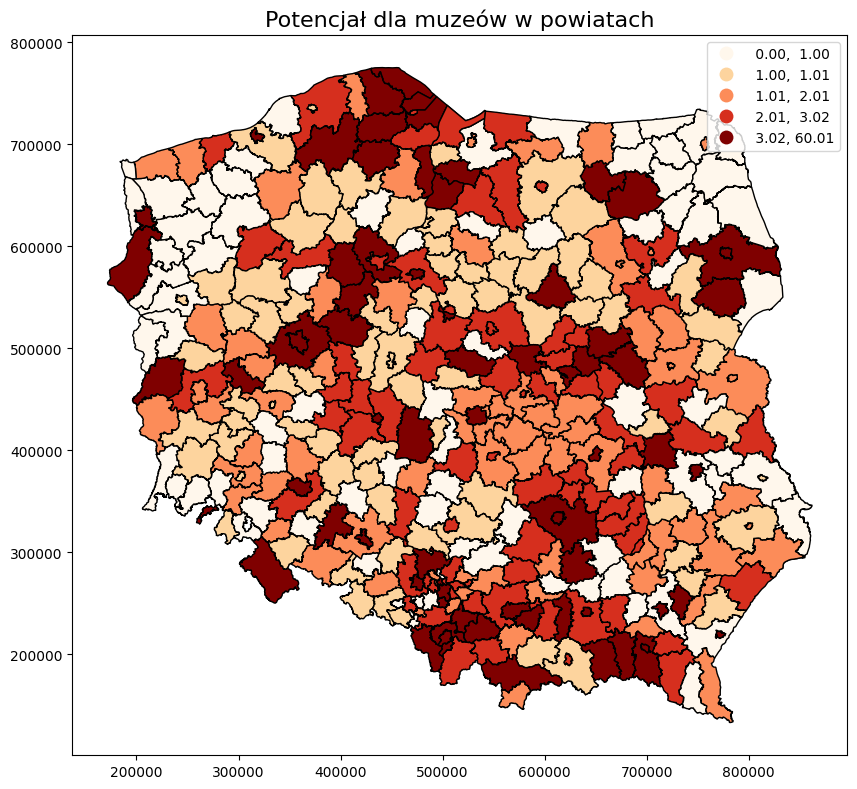

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
gdf.plot(
    column='U_i',          
    cmap='OrRd',          
    scheme='quantiles',   
    k=5,                  # liczba klas
    legend=True,        
    edgecolor='black',  
    ax=ax                 
)

# Dodanie tytułu
ax.set_title("Potencjał dla muzeów w powiatach", fontsize=16)

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Potencjał dla ludności w powiatach')

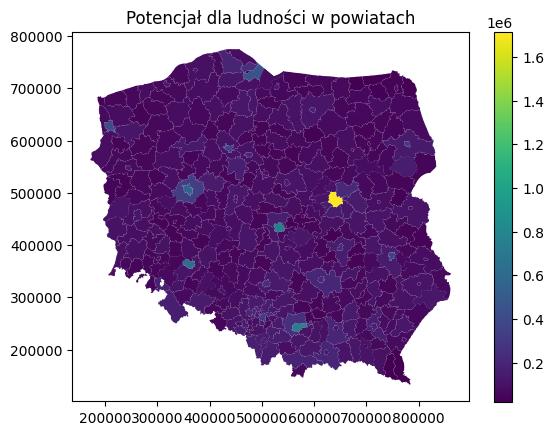

In [197]:
gdf.plot(column='V_i', legend=True)
plt.title("Potencjał dla ludności w powiatach")

Text(0.5, 1.0, 'Wskaźnik dostępności muzeów w powiatach')

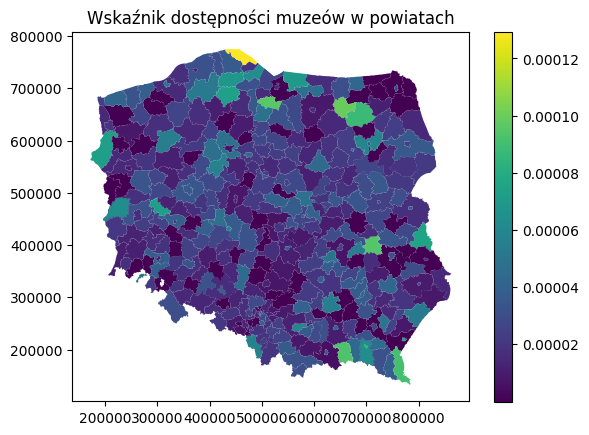

In [88]:
gdf.plot(column='D_i', legend=True)
plt.title("Wskaźnik dostępności muzeów w powiatach")